In [2]:
import re

import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from ALLCools.plot import *
from matplotlib import patches
from matplotlib.cm import get_cmap
from matplotlib.colors import ListedColormap, Normalize

In [3]:
from matplotlib import rc
labelsize = 6
linewidth = 0.6
rc('lines', linewidth=linewidth)
rc('axes', labelsize=labelsize, linewidth=linewidth)
rc('xtick', labelsize=labelsize)
rc('ytick', labelsize=labelsize)
rc('xtick.major', width=linewidth)
rc('ytick.major', width=linewidth)
rc('xtick.minor', width=linewidth - 0.2)
rc('ytick.minor', width=linewidth - 0.2)

In [4]:
exc_tf = pd.read_csv('exc.tf.sum_rs.csv', header=None, index_col=0, squeeze=True)
exc_other = pd.read_csv('exc.other.sum_rs.csv', header=None, index_col=0, squeeze=True)
exc_motif = pd.read_csv('exc.motif.sum_rs.csv', header=None, index_col=0, squeeze=True)
inh_tf = pd.read_csv('inh.tf.sum_rs.csv', header=None, index_col=0, squeeze=True)
inh_other = pd.read_csv('inh.other.sum_rs.csv', header=None, index_col=0, squeeze=True)
inh_motif = pd.read_csv('inh.motif.sum_rs.csv', header=None, index_col=0, squeeze=True)

In [5]:
a, b, c = exc_tf.size, (exc_tf.index & inh_tf.index).size, inh_tf.size
a, b, c

(406, 292, 412)

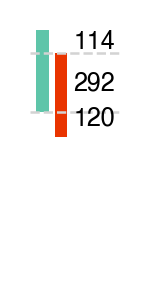

In [6]:
fig, ax = plt.subplots(figsize=(0.4, 1), dpi=300)

ax.axis('off')

from matplotlib import patches

p1 = patches.Rectangle((0, 0), 1, a, fc='#5ec5a9')
p2 = patches.Rectangle((1.5, a - b), 1, c, fc='#e93400')

ax.add_patch(p1)
ax.add_patch(p2)
ax.set_ylim(a + b + c, 0)
ax.set_xlim(-0.5, 7)

ax.axhline(a - b, c='lightgray', linestyle='--')
ax.axhline(a, c='lightgray', linestyle='--')

ax.text(3, (a - b) / 2, a - b, fontsize=labelsize, va='center')
ax.text(3, a - (b) / 2, b, fontsize=labelsize, va='center')
ax.text(3, a + (c - b) / 2, c - b, fontsize=labelsize)

fig.savefig('tf_overlap.pdf')

In [9]:
motif_gene_anno = pd.read_csv(
    '/home/hanliu/project/mouse_rostral_brain/study/MotifClustering/JASPAR2020_CORE_vertebrates_non-redundant.mouse_genes.with_motif_group.199.csv', 
    index_col=0
)
tf_class = pd.read_csv('/home/hanliu/ref/TFGene/TFClass/TFClass.with_mouse_gene_id.csv')
for tf_col in ['Class', 'Family', 'SubFamily']:
    gene_class_map = {}
    for _, (class_name, genes) in tf_class[[tf_col, 'EnsemblID']].iterrows():
        if isinstance(genes, float):
            continue
        for gene in genes.split(','):
            gene_class_map[gene] = class_name
    
    motif_gene_anno[tf_col] = motif_gene_anno['gene_ids'].apply(lambda i: gene_class_map.get(i.split('.')[0], ''))

motif_gene_anno['SubFamily'] = motif_gene_anno['SubFamily'].replace('', np.nan).fillna('unclassified')
motif_gene_anno.head()

,motif_name,motif_genes,gene_ids,gene_names,motif_group,Class,Family,SubFamily
motif_uid,,,,,,,,
MA0006.1,Ahr::Arnt,"Ahr,Arnt","ENSMUSG00000019256.17,ENSMUSG00000015522.18","Ahr,Arnt",MotifGroup178,Basic helix-loop-helix factors (bHLH),PAS,PAS-AHR
MA0854.1,Alx1,Alx1,ENSMUSG00000036602.14,Alx1,MotifGroup3,Homeo domain factors,Paired-related HD,ALX
MA0634.1,ALX3,ALX3,ENSMUSG00000014603.3,Alx3,MotifGroup3,Homeo domain factors,Paired-related HD,TPRX
MA0853.1,Alx4,Alx4,ENSMUSG00000040310.12,Alx4,MotifGroup3,Homeo domain factors,Paired-related HD,ALX
MA0007.3,Ar,Ar,ENSMUSG00000046532.8,Ar,MotifGroup32,Nuclear receptors with C4 zinc fingers,Steroid hormone receptors,GR-like(NR3C)


In [15]:
exc_motif_class = exc_motif.groupby(motif_gene_anno['SubFamily']).max()
inh_motif_class = inh_motif.groupby(motif_gene_anno['SubFamily']).max()


In [19]:
motif_gene_anno['SubFamily'].unique().size

200

In [16]:
a, b, c = exc_motif_class.size, (exc_motif_class.index & inh_motif_class.index).size, inh_motif_class.size
a, b, c

(137, 134, 164)

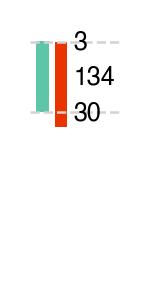

In [17]:
fig, ax = plt.subplots(figsize=(0.4, 1), dpi=300)

ax.axis('off')

from matplotlib import patches

p1 = patches.Rectangle((0, 0), 1, a, fc='#5ec5a9')
p2 = patches.Rectangle((1.5, a - b), 1, c, fc='#e93400')

ax.add_patch(p1)
ax.add_patch(p2)
ax.set_ylim(a + b + c, 0)
ax.set_xlim(-0.5, 7)

ax.axhline(a - b, c='lightgray', linestyle='--')
ax.axhline(a, c='lightgray', linestyle='--')

ax.text(3, (a - b) / 2, a - b, fontsize=labelsize, va='center')
ax.text(3, a - (b) / 2, b, fontsize=labelsize, va='center')
ax.text(3, a + (c - b) / 2, c - b, fontsize=labelsize)

fig.savefig('motif_overlap.pdf')

In [6]:
a, b, c = exc_other.size, (exc_other.index & inh_other.index).size, inh_other.size
a, b, c

(6038, 4203, 5975)

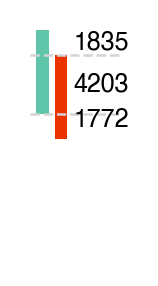

In [7]:
fig, ax = plt.subplots(figsize=(0.4, 1), dpi=300)

ax.axis('off')

from matplotlib import patches

p1 = patches.Rectangle((0, 0), 1, a, fc='#5ec5a9')
p2 = patches.Rectangle((1.5, a - b), 1, c, fc='#e93400')

ax.add_patch(p1)
ax.add_patch(p2)
ax.set_ylim(a + b + c, 0)
ax.set_xlim(-0.5, 7)

ax.axhline(a - b, c='lightgray', linestyle='--')
ax.axhline(a, c='lightgray', linestyle='--')

ax.text(3, (a - b) / 2, a - b, fontsize=labelsize, va='center')
ax.text(3, a - (b) / 2, b, fontsize=labelsize, va='center')
ax.text(3, a + (c - b) / 2, c - b, fontsize=labelsize)
fig.savefig('other_gene_overlap.pdf')

In [8]:
motif_gene_anno = pd.read_csv(
    '/home/hanliu/project/mouse_rostral_brain/study/MotifClustering/JASPAR2020_CORE_vertebrates_non-redundant.mouse_genes.with_motif_group.199.csv', 
    index_col=0
)
tf_class = pd.read_csv('/home/hanliu/ref/TFGene/TFClass/TFClass.with_mouse_gene_id.csv')
for tf_col in ['Class', 'Family', 'SubFamily']:
    gene_class_map = {}
    for _, (class_name, genes) in tf_class[[tf_col, 'EnsemblID']].iterrows():
        if isinstance(genes, float):
            continue
        for gene in genes.split(','):
            gene_class_map[gene] = class_name
    
    motif_gene_anno[tf_col] = motif_gene_anno['gene_ids'].apply(lambda i: gene_class_map.get(i.split('.')[0], ''))

motif_gene_anno['SubFamily'] = motif_gene_anno['SubFamily'].replace('', np.nan).fillna('unclassified')
motif_gene_anno.head()

,motif_name,motif_genes,gene_ids,gene_names,motif_group,Class,Family,SubFamily
motif_uid,,,,,,,,
MA0006.1,Ahr::Arnt,"Ahr,Arnt","ENSMUSG00000019256.17,ENSMUSG00000015522.18","Ahr,Arnt",MotifGroup178,Basic helix-loop-helix factors (bHLH),PAS,PAS-AHR
MA0854.1,Alx1,Alx1,ENSMUSG00000036602.14,Alx1,MotifGroup3,Homeo domain factors,Paired-related HD,ALX
MA0634.1,ALX3,ALX3,ENSMUSG00000014603.3,Alx3,MotifGroup3,Homeo domain factors,Paired-related HD,TPRX
MA0853.1,Alx4,Alx4,ENSMUSG00000040310.12,Alx4,MotifGroup3,Homeo domain factors,Paired-related HD,ALX
MA0007.3,Ar,Ar,ENSMUSG00000046532.8,Ar,MotifGroup32,Nuclear receptors with C4 zinc fingers,Steroid hormone receptors,GR-like(NR3C)


In [17]:
exc_other.sort_values(ascending=False).head(12)

0
Shisa9     8.060554
Lpp        7.733516
Parn       7.395792
Cdh13      7.157871
Dok5       7.106986
Qk         7.081220
Pam        7.021499
Carmil1    6.988186
March4     6.947297
Rab3c      6.929791
Mgll       6.861320
Prex1      6.789408
Name: 1, dtype: float64

In [18]:
inh_other.size

5975

In [19]:
exc_other.size

6038

## Motif Joint

In [32]:
total = pd.DataFrame([exc_motif, inh_motif]).T.fillna(0)
total.columns = ['exc', 'inh']

total['SubFamily'] = total.index.map(motif_gene_anno['SubFamily'])
total['motif_group'] = total.index.map(motif_gene_anno['motif_group'])

total['gene_names'] = total.index.map(motif_gene_anno['gene_names'])

# annotate gene
annotate = total[(total['exc'] > 2) | (total['inh'] > 2) |
                 ((total['exc'] > 5) & (total['inh'] > 5))]
total['color'] = total.index.isin(annotate.index)


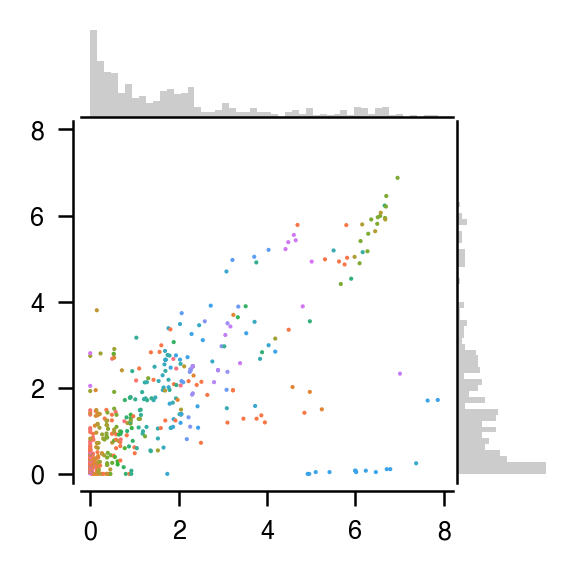

In [33]:
fig = plt.figure(figsize=(2, 2), dpi=300)
gs = fig.add_gridspec(20, 20)
flank_size = 4

ax_joint = fig.add_subplot(gs[flank_size:, :-flank_size])
ax_exc = fig.add_subplot(gs[:flank_size, :-flank_size])
ax_inh = fig.add_subplot(gs[flank_size:, -flank_size:])

ax = ax_joint
sns.scatterplot(ax=ax,
                data=total,
                x='exc',
                y='inh',
                s=1,
                hue='SubFamily',
                #palette={True:'red', False: 'black'},
                linewidth=0, legend=False)

ax.set(xlim=(-0.2, 8.2),
       ylim=(-0.2, 8.2),
       xticks=[0, 2, 4, 6, 8],
       yticks=[0, 2, 4, 6, 8],
       xlabel='',
       ylabel='')
sns.despine(ax=ax, offset=2)


ax = ax_exc
sns.distplot(ax=ax, a=total['exc'], bins=50, kde=False, color='gray')
ax.set(xlim=ax_joint.get_xlim(),
       ylim=(0, 50),
       xticks=[],
       yticks=[],
       xlabel='',
       ylabel='')
sns.despine(ax=ax, left=True, bottom=False)

ax = ax_inh
sns.distplot(ax=ax, a=total['inh'], bins=50, kde=False, vertical=True, color='gray')
ax.set(xlim=(0, 50),
       ylim=ax_joint.get_xlim(),
       xticks=[],
       yticks=[],
       xlabel='',
       ylabel='')
sns.despine(ax=ax, left=False, bottom=True)

fig.savefig('JointRSSum.Motif.pdf')

In [34]:
annotate.head()

,exc,inh,SubFamily,motif_group,gene_names
MA0142.1,0.149652,3.800636,POU5,MotifGroup183,"Pou5f1,Sox2"
MA1520.1,0.233601,2.797730,Large MAF,MotifGroup8,Maf
MA0077.1,0.495657,2.674502,Group E,MotifGroup59,Sox9
MA0868.2,0.532121,2.775892,Group E,MotifGroup59,Sox8
MA1152.1,0.532121,2.790897,Group G,MotifGroup59,Sox15


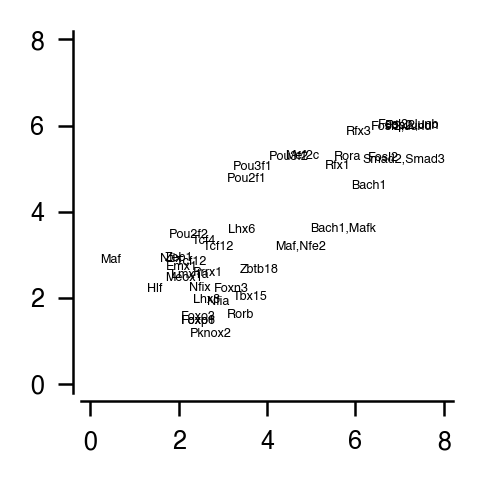

In [35]:
fig = plt.figure(figsize=(2, 2), dpi=300)

gs = fig.add_gridspec(20, 20)
flank_size = 4

ax_joint = fig.add_subplot(gs[flank_size:, :-flank_size])

ax = ax_joint
sns.scatterplot(ax=ax,
                data=total,
                x='exc',
                y='inh',
                s=1,
                linewidth=0,
                color='black')

texts = []
from adjustText import adjust_text
appeared_tfs = exc_tf[exc_tf > 1].index | inh_tf[inh_tf > 1].index
_annotate = annotate[annotate['gene_names'].apply(lambda i: any([(g in appeared_tfs) for g in i.split(',')]))]


for gene_name, (x, y, family, group, name) in _annotate.iterrows():
    t = ax.text(x, y, name, fontsize=3)
    texts.append(t)
#adjust_text(texts)

ax.set(xlim=(-0.2, 8.2),
       ylim=(-0.2, 8.2),
       xticks=[0, 2, 4, 6, 8],
       yticks=[0, 2, 4, 6, 8],
       xlabel='',
       ylabel='')
sns.despine(ax=ax, offset=2)

ax_joint.collections[0].remove()

fig.savefig('JointRSSum.Motif.Text.pdf')

## TF Joint

In [13]:
total = pd.DataFrame([exc_tf, inh_tf]).T.fillna(0)
total.columns = ['exc', 'inh']

# annotate gene
annotate = total[(total['exc'] > 6) | (total['inh'] > 6) |
                 ((total['exc'] > 5) & (total['inh'] > 5))]
total['color'] = total.index.isin(annotate.index)


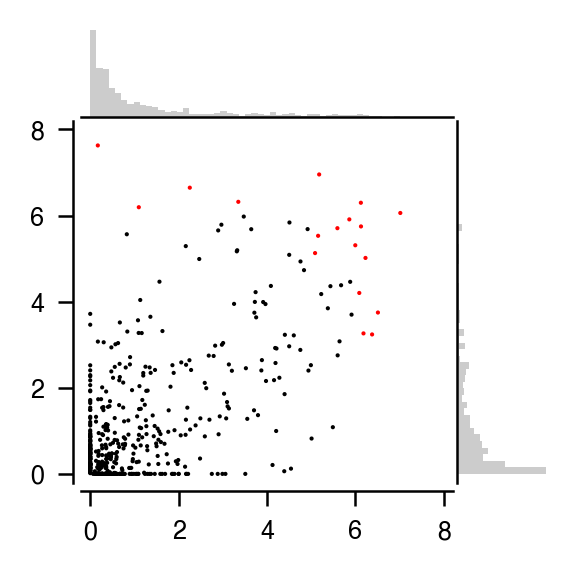

In [14]:
fig = plt.figure(figsize=(2, 2), dpi=300)
gs = fig.add_gridspec(20, 20)
flank_size = 4

ax_joint = fig.add_subplot(gs[flank_size:, :-flank_size])
ax_exc = fig.add_subplot(gs[:flank_size, :-flank_size])
ax_inh = fig.add_subplot(gs[flank_size:, -flank_size:])

ax = ax_joint
sns.scatterplot(ax=ax,
                data=total,
                x='exc',
                y='inh',
                s=1,
                hue='color',
                palette={True:'red', False: 'black'},
                linewidth=0, legend=False)

ax.set(xlim=(-0.2, 8.2),
       ylim=(-0.2, 8.2),
       xticks=[0, 2, 4, 6, 8],
       yticks=[0, 2, 4, 6, 8],
       xlabel='',
       ylabel='')
sns.despine(ax=ax, offset=2)


ax = ax_exc
sns.distplot(ax=ax, a=total['exc'], bins=50, kde=False, color='gray')
ax.set(xlim=ax_joint.get_xlim(),
       ylim=(0, 100),
       xticks=[],
       yticks=[],
       xlabel='',
       ylabel='')
sns.despine(ax=ax, left=True, bottom=False)

ax = ax_inh
sns.distplot(ax=ax, a=total['inh'], bins=50, kde=False, vertical=True, color='gray')
ax.set(xlim=(0, 100),
       ylim=ax_joint.get_xlim(),
       xticks=[],
       yticks=[],
       xlabel='',
       ylabel='')
sns.despine(ax=ax, left=False, bottom=True)

fig.savefig('JointRSSum.TFs.pdf')

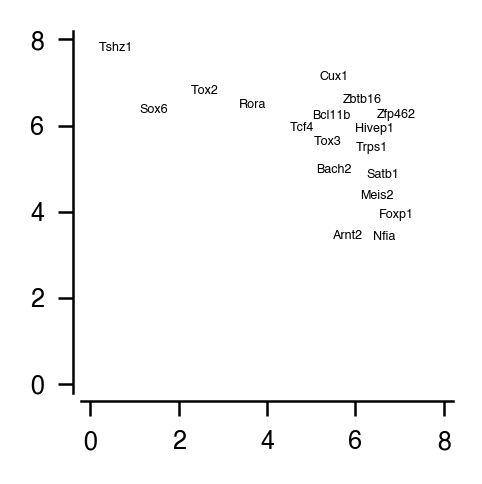

In [15]:
fig = plt.figure(figsize=(2, 2), dpi=300)

gs = fig.add_gridspec(20, 20)
flank_size = 4

ax_joint = fig.add_subplot(gs[flank_size:, :-flank_size])

ax = ax_joint
sns.scatterplot(ax=ax,
                data=total,
                x='exc',
                y='inh',
                s=1,
                linewidth=0,
                color='black')

texts = []
from adjustText import adjust_text

for gene_name, (x, y) in annotate.iterrows():
    t = ax.text(x, y, gene_name, fontsize=3)
    texts.append(t)
adjust_text(texts)

ax.set(xlim=(-0.2, 8.2),
       ylim=(-0.2, 8.2),
       xticks=[0, 2, 4, 6, 8],
       yticks=[0, 2, 4, 6, 8],
       xlabel='',
       ylabel='')
sns.despine(ax=ax, offset=2)

ax_joint.collections[0].remove()

fig.savefig('JointRSSum.TFs.Text.pdf')

## Other genes joint

In [28]:
total = pd.DataFrame([exc_other, inh_other]).T.fillna(0)
total.columns = ['exc', 'inh']

# annotate gene
annotate = total[(total['exc'] > 6.8) | (total['inh'] > 6.5) |
                 ((total['exc'] > 6) & (total['inh'] > 6))]
total['color'] = total.index.isin(annotate.index)


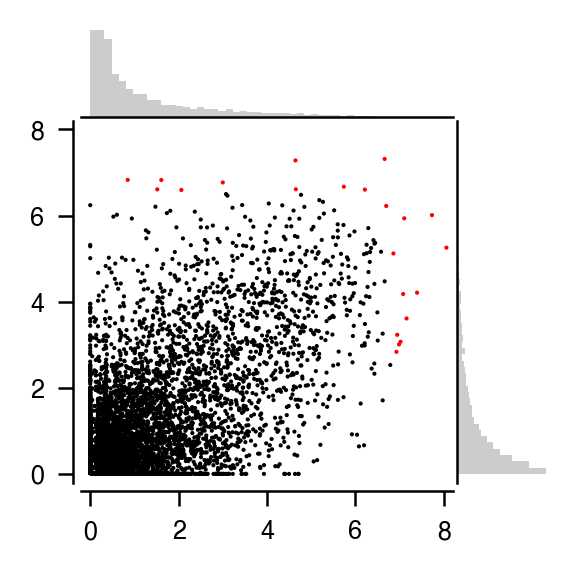

In [29]:
fig = plt.figure(figsize=(2, 2), dpi=300)
gs = fig.add_gridspec(20, 20)
flank_size = 4

ax_joint = fig.add_subplot(gs[flank_size:, :-flank_size])
ax_exc = fig.add_subplot(gs[:flank_size, :-flank_size])
ax_inh = fig.add_subplot(gs[flank_size:, -flank_size:])

ax = ax_joint
sns.scatterplot(ax=ax,
                data=total,
                x='exc',
                y='inh',
                s=1,
                hue='color',
                palette={True:'red', False: 'black'},
                linewidth=0, legend=False)

ax.set(xlim=(-0.2, 8.2),
       ylim=(-0.2, 8.2),
       xticks=[0, 2, 4, 6, 8],
       yticks=[0, 2, 4, 6, 8],
       xlabel='',
       ylabel='')
sns.despine(ax=ax, offset=2)


ax = ax_exc
sns.distplot(ax=ax, a=total['exc'], bins=50, kde=False, color='gray')
ax.set(xlim=ax_joint.get_xlim(),
       ylim=(0, 1000),
       xticks=[],
       yticks=[],
       xlabel='',
       ylabel='')
sns.despine(ax=ax, left=True, bottom=False)

ax = ax_inh
sns.distplot(ax=ax, a=total['inh'], bins=50, kde=False, vertical=True, color='gray')
ax.set(xlim=(0, 1000),
       ylim=ax_joint.get_xlim(),
       xticks=[],
       yticks=[],
       xlabel='',
       ylabel='')
sns.despine(ax=ax, left=False, bottom=True)

fig.savefig('JointRSSum.Other.pdf')

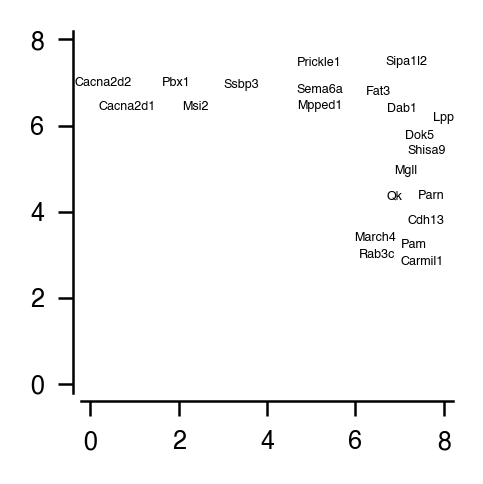

In [30]:
fig = plt.figure(figsize=(2, 2), dpi=300)

gs = fig.add_gridspec(20, 20)
flank_size = 4

ax_joint = fig.add_subplot(gs[flank_size:, :-flank_size])

ax = ax_joint
sns.scatterplot(ax=ax,
                data=total,
                x='exc',
                y='inh',
                s=1,
                linewidth=0,
                color='black')

texts = []
from adjustText import adjust_text

for gene_name, (x, y) in annotate.iterrows():
    t = ax.text(x, y, gene_name, fontsize=3)
    texts.append(t)
adjust_text(texts)

ax.set(xlim=(-0.2, 8.2),
       ylim=(-0.2, 8.2),
       xticks=[0, 2, 4, 6, 8],
       yticks=[0, 2, 4, 6, 8],
       xlabel='',
       ylabel='')
sns.despine(ax=ax, offset=2)

ax_joint.collections[0].remove()

fig.savefig('JointRSSum.Other.Text.pdf')